In [80]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import statsmodels.formula.api as smf
warnings.filterwarnings('ignore')
from scipy import stats
from scipy.stats import norm, skew
from sklearn.preprocessing import LabelEncoder
import statsmodels.api as sm
blue = sns.color_palette('Blues')[-2]
color = sns.color_palette() 
sns.set_style('darkgrid') 
pd.set_option('display.float_format', lambda x: '{:.3f}'.format(x)) #Limiting floats output to 3 decimal points


In [81]:
train_missing = pd.read_csv('train.csv')
test_missing = pd.read_csv('test.csv') 
all_data1 = pd.concat((train_missing, test_missing)).reset_index(drop=True)
all_data1.drop(['SalePrice'], axis=1, inplace=True)
all_data1.drop(['Id'], axis=1, inplace=True)
print("all_data1 size is : {}".format(all_data1.shape))

all_data1 size is : (2412, 78)


In [82]:
train = pd.read_csv('Train_EDA.csv')
test=pd.read_csv('Test_EDA.csv')
all_data = pd.concat((train, test)).reset_index(drop=True)
print("all_data size is : {}".format(all_data.shape))
train.head()

all_data size is : (2412, 82)


,Unnamed: 0,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BoxCoxPrice,BsmtCond,BsmtExposure,...,SaleType,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemod/Add,YrSold
0,0,864,0,0,None,3,1Fam,7.749,TA,No,...,WD,0,Pave,6,864.000,AllPub,0,1978,2005,2009
1,1,1368,0,0,None,3,1Fam,7.697,TA,Mn,...,WD,0,Pave,6,1078.000,AllPub,0,1950,1950,2009
2,2,1113,858,0,None,3,1Fam,7.991,TA,Mn,...,WD,0,Pave,8,1113.000,AllPub,0,2005,2005,2009
3,3,684,720,0,Pave,3,Twnhs,7.836,TA,No,...,WD,0,Pave,5,672.000,AllPub,20,1999,2000,2008
4,4,815,875,0,None,3,1Fam,7.770,TA,No,...,ConLw,0,Pave,7,815.000,AllPub,0,1916,1950,2006


In [83]:
# Check for duplicates  (only test set has Id)
idsUnique = len(set(test_missing.Id))
idsTotal = test_missing.shape[0]
idsDupli = idsTotal - idsUnique
print("There are " + str(idsDupli) + " duplicate IDs for " + str(idsTotal) + " total entries")

There are 0 duplicate IDs for 1608 total entries


In [84]:
# Drop Id column
test_missing.drop("Id", axis = 1, inplace = True)
print("The train data size before dropping Id feature is : {} ".format(train.shape))
print("The test data size after dropping Id feature is : {} ".format(test.shape))

The train data size before dropping Id feature is : (804, 82) 
The test data size after dropping Id feature is : (1608, 79) 


# Exploratory data analysis and feature engineering

## Outliers

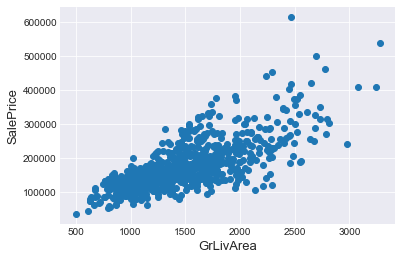

In [101]:
fig, ax = plt.subplots()
ax.scatter(x = train_missing['GrLivArea'], y = train['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GrLivArea', fontsize=13)
plt.show()

## Missing data by feature

In [86]:
ntrain = train_missing.shape[0]
ntest = test_missing.shape[0]
y_train = train_missing.SalePrice.values
all_data_na = (all_data1.isnull().sum() / len(all_data)) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)[:30]


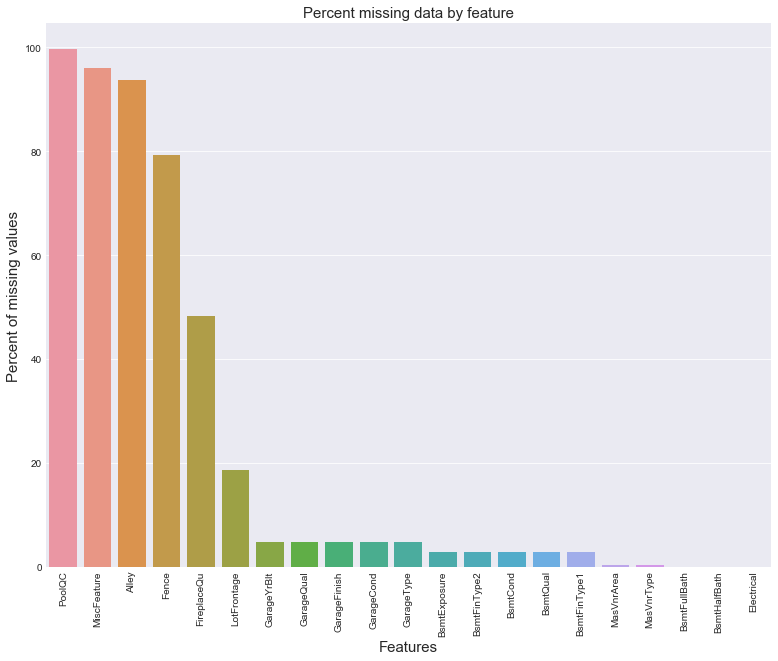

In [87]:
f, ax = plt.subplots(figsize=(13, 10))
plt.xticks(rotation='90')
sns.barplot(x=all_data_na.index, y=all_data_na)
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of missing values', fontsize=15)
plt.title('Percent missing data by feature', fontsize=15)

## Target Variable

In [88]:
prices=['SalePrice','LogPrice']


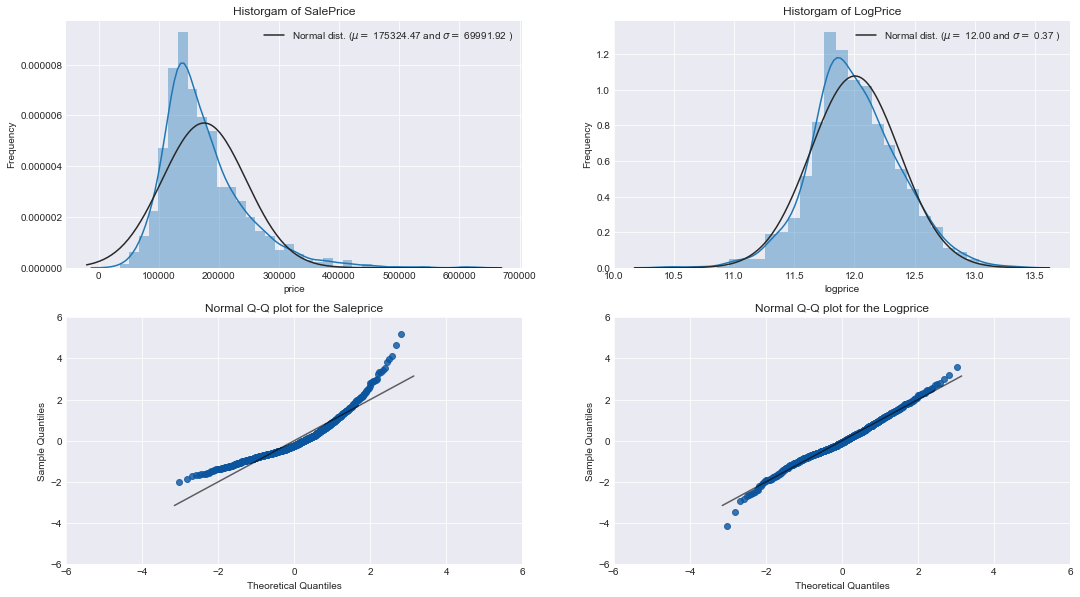

In [89]:
fig, ax= plt.subplots(2,2, figsize=(18,10))
sns.distplot(train['SalePrice'] , fit=norm,ax=ax[0,0]);
(mu, sigma) = norm.fit(train['SalePrice'])
ax[0,0].legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
ax[0,0].set(title='Historgam of SalePrice', xlabel='price',ylabel='Frequency')

pp = sm.ProbPlot(train['SalePrice'], fit=True)
qq = pp.qqplot(color=sns.color_palette('Blues')[-1], alpha=0.8, ax=ax[1,0])
a=ax[1,0].get_xlim()[0]
b=ax[1,0].get_xlim()[1]
ax[1,0].plot([a,b],[a,b], color='black', alpha=0.6)
ax[1,0].set_xlim(-6,6)
ax[1,0].set_ylim(-6,6)
ax[1,0].set_title('Normal Q-Q plot for the Saleprice')

sns.distplot(train['LogPrice'] , fit=norm,ax=ax[0,1]);
(mu, sigma) = norm.fit(train['LogPrice'])
ax[0,1].set(title='Historgam of LogPrice', xlabel='logprice',ylabel='Frequency')
ax[0,1].legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
pp = sm.ProbPlot(train['LogPrice'], fit=True)
qq = pp.qqplot(color=sns.color_palette('Blues')[-1], alpha=0.8, ax=ax[1,1])
a=ax[1,1].get_xlim()[0]
b=ax[1,1].get_xlim()[1]
ax[1,1].plot([a,b],[a,b], color='black', alpha=0.6)
ax[1,1].set_xlim(-6,6)
ax[1,1].set_ylim(-6,6)
ax[1,1].set_title('Normal Q-Q plot for the Logprice')

plt.show()

## correlation matrix

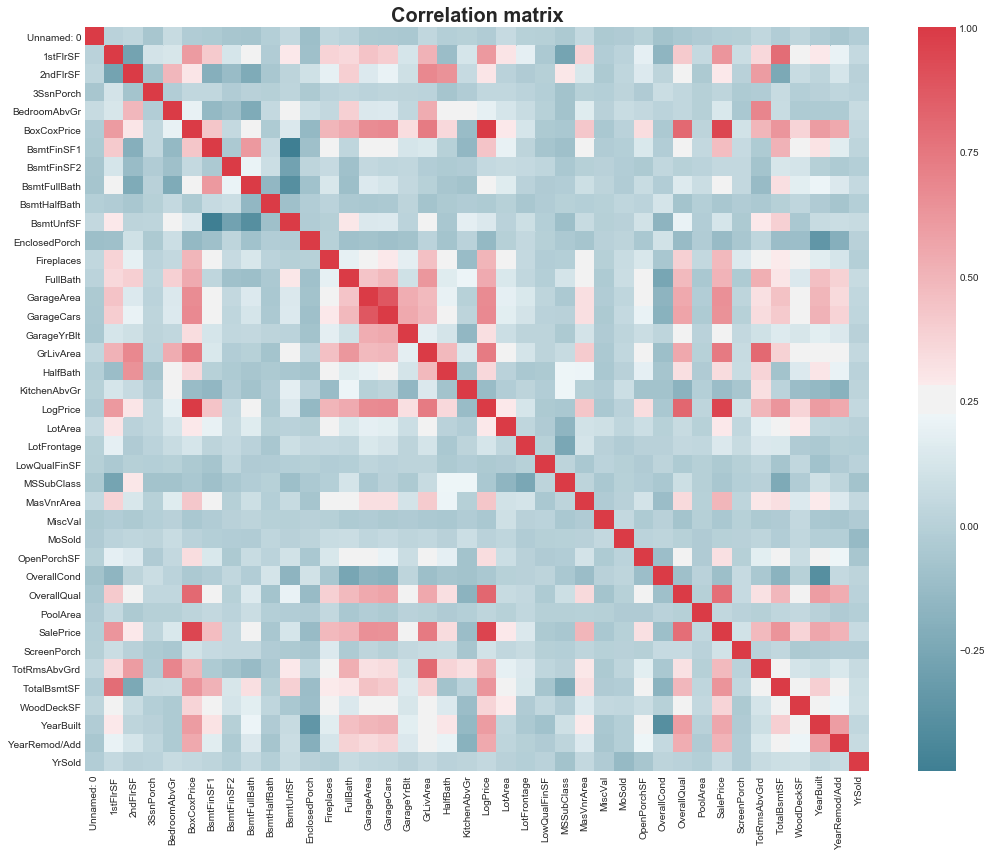

In [90]:
train.corr().round(2)
fig, ax = plt.subplots(figsize=(15,12))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(train.corr(), ax=ax, cmap=cmap)
ax.set_title('Correlation matrix', fontweight='bold', fontsize=20)
plt.tight_layout()
plt.show()
## zoe: using old train set as well.

# TotalSF 

In [91]:
train['TotalSF'] = train['TotalBsmtSF'] + train['1stFlrSF'] + train['2ndFlrSF'] 
Variables=['TotalBsmtSF', '1stFlrSF', '2ndFlrSF','TotalSF','SalePrice']
table1_1=train[Variables].corr() 
table1_1.to_csv("table1_1.csv")
table1_1

,TotalBsmtSF,1stFlrSF,2ndFlrSF,TotalSF,SalePrice
TotalBsmtSF,1.000,0.791,-0.239,0.803,0.635
1stFlrSF,0.791,1.000,-0.277,0.770,0.629
2ndFlrSF,-0.239,-0.277,1.000,0.308,0.292
TotalSF,0.803,0.770,0.308,1.000,0.828
SalePrice,0.635,0.629,0.292,0.828,1.000


In [92]:
train_missing['TotalSF'] = train_missing['TotalBsmtSF'] + train_missing['1stFlrSF'] +train_missing['2ndFlrSF']
test['TotalSF'] = test['TotalBsmtSF'] + test['1stFlrSF'] +test['2ndFlrSF']
test_missing['TotalSF'] = test_missing['TotalBsmtSF'] + test_missing['1stFlrSF'] + test_missing['2ndFlrSF']

In [93]:
del train['TotalBsmtSF'] 
del train['1stFlrSF']
del train['2ndFlrSF']


del train_missing['TotalBsmtSF'] 
del train_missing['1stFlrSF']
del train_missing['2ndFlrSF']

del test['TotalBsmtSF'] 
del test['1stFlrSF']
del test['2ndFlrSF']

del test_missing['TotalBsmtSF'] 
del test_missing['1stFlrSF']
del test_missing['2ndFlrSF']

## box plot of OverallQual vs Logprice

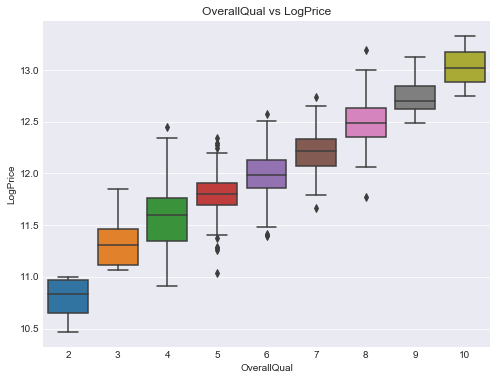

In [94]:
var = 'OverallQual'
data = pd.concat([train['LogPrice'], train[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="LogPrice", data=train)
ax.set_title('OverallQual vs LogPrice')
#fig.axis(ymin=0, ymax=800000);

## linear relationship

### TotalSF

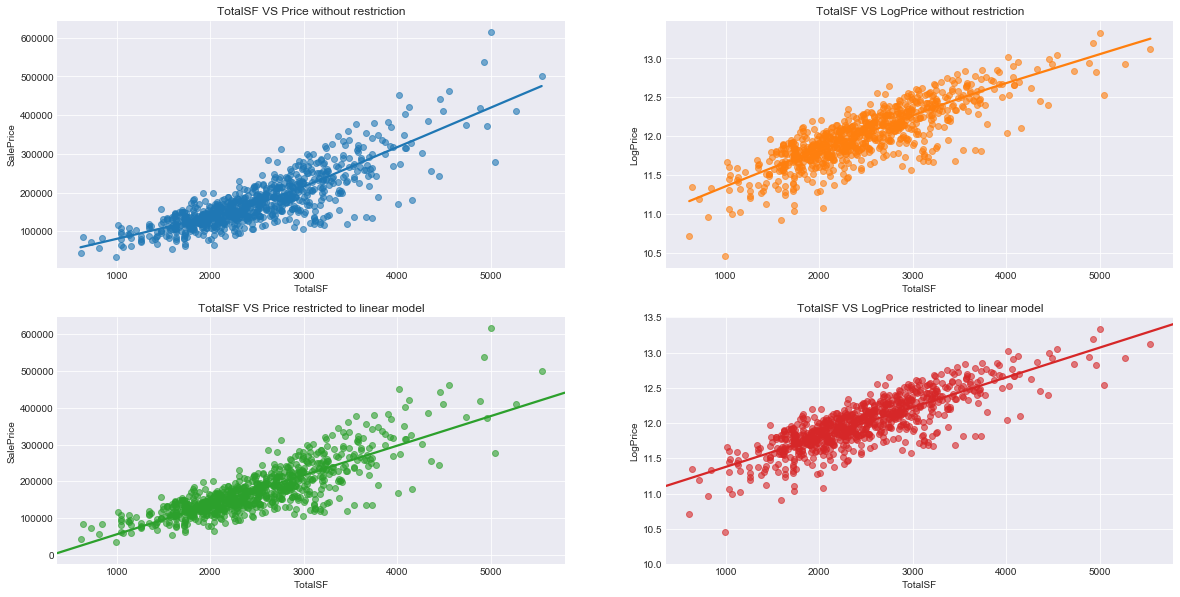

In [95]:
fig, ax= plt.subplots(2,2, figsize=(20,10))

sns.regplot(train['TotalSF'], train['SalePrice'], ax=ax[0,0],ci=True, lowess=True, scatter_kws={'alpha':0.6})
ax[0,0].set(title='TotalSF VS Price without restriction',xlabel='TotalSF')

sns.regplot(train['TotalSF'], train['LogPrice'], ax=ax[0,1],ci=True, lowess=True,scatter_kws={'alpha':0.6})
ax[0,1].set(title='TotalSF VS LogPrice without restriction',xlabel='TotalSF')


sns.regplot(train['TotalSF'], train['SalePrice'], ax=ax[1,0],ci=True, scatter_kws={'alpha':0.6})
ax[1,0].set(title='TotalSF VS Price restricted to linear model',xlabel='TotalSF')

sns.regplot(train['TotalSF'], train['LogPrice'], ax=ax[1,1],ci=True, scatter_kws={'alpha':0.6})
ax[1,1].set(title='TotalSF VS LogPrice restricted to linear model',xlabel='TotalSF')
ax[1,1].set_ylim(10,13.5)

plt.show()

### GrLivArea

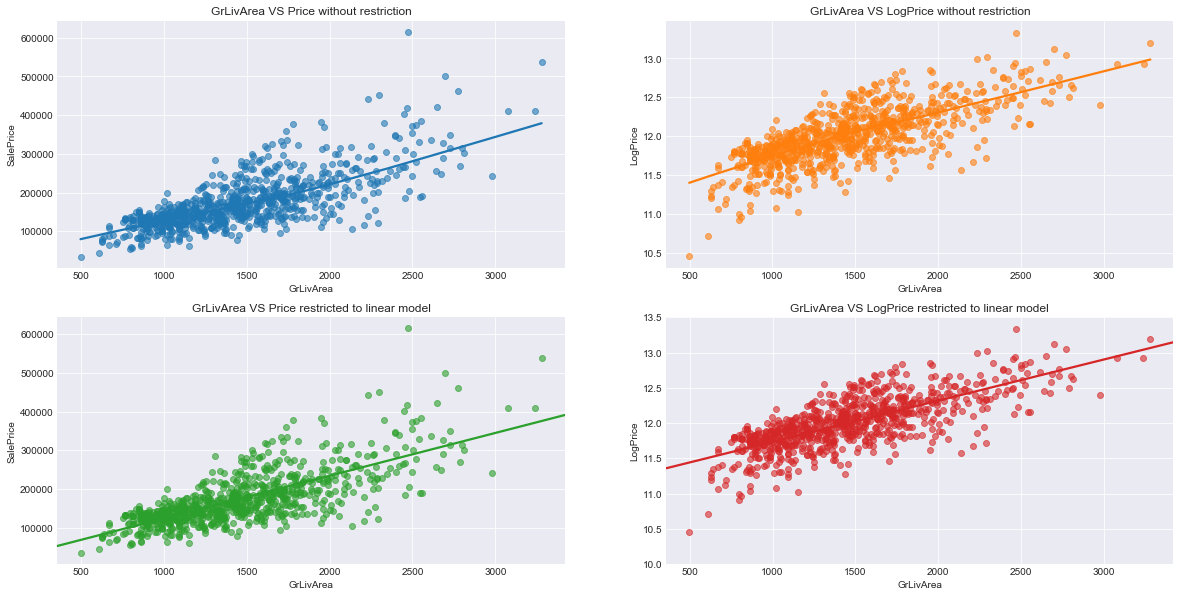

In [96]:
fig, ax= plt.subplots(2,2, figsize=(20,10))

sns.regplot(train['GrLivArea'], train['SalePrice'], ax=ax[0,0],ci=True, lowess=True, scatter_kws={'alpha':0.6})
ax[0,0].set(title='GrLivArea VS Price without restriction',xlabel='GrLivArea')

sns.regplot(train['GrLivArea'], train['LogPrice'], ax=ax[0,1],ci=True, lowess=True,scatter_kws={'alpha':0.6})
ax[0,1].set(title='GrLivArea VS LogPrice without restriction',xlabel='GrLivArea')


sns.regplot(train['GrLivArea'], train['SalePrice'], ax=ax[1,0],ci=True, scatter_kws={'alpha':0.6})
ax[1,0].set(title='GrLivArea VS Price restricted to linear model',xlabel='GrLivArea')

sns.regplot(train['GrLivArea'], train['LogPrice'], ax=ax[1,1],ci=True, scatter_kws={'alpha':0.6})
ax[1,1].set(title='GrLivArea VS LogPrice restricted to linear model',xlabel='GrLivArea')
ax[1,1].set_ylim(10,13.5)

plt.show()

### GarageArea

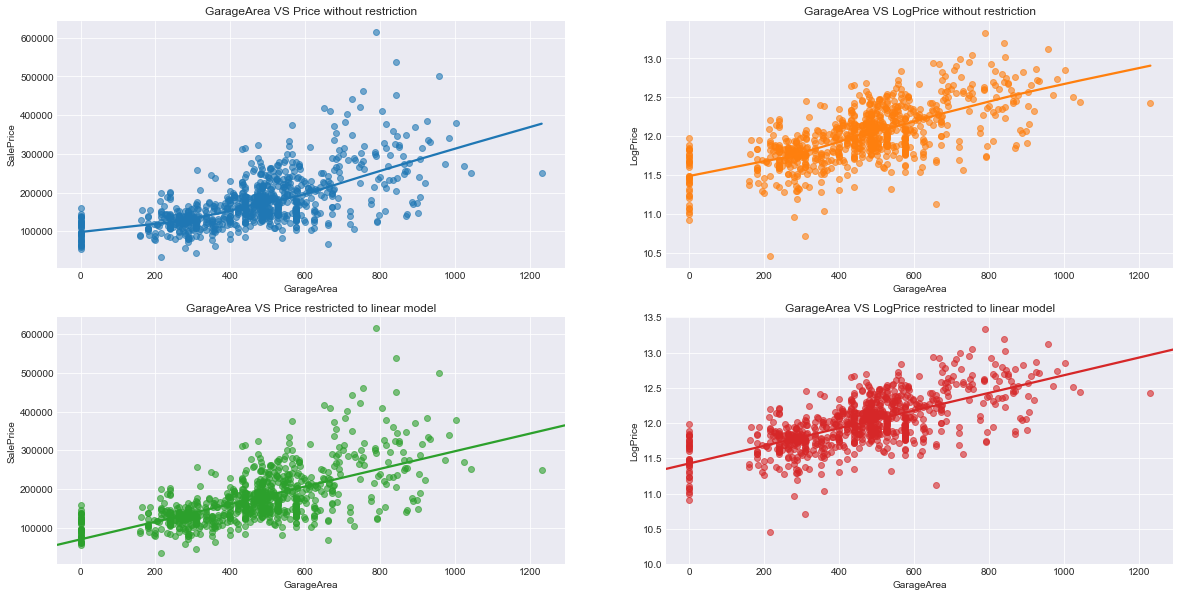

In [97]:
fig, ax= plt.subplots(2,2, figsize=(20,10))

sns.regplot(train['GarageArea'], train['SalePrice'], ax=ax[0,0],ci=True, lowess=True, scatter_kws={'alpha':0.6})
ax[0,0].set(title='GarageArea VS Price without restriction',xlabel='GarageArea')

sns.regplot(train['GarageArea'], train['LogPrice'], ax=ax[0,1],ci=True, lowess=True,scatter_kws={'alpha':0.6})
ax[0,1].set(title='GarageArea VS LogPrice without restriction',xlabel='GarageArea')

sns.regplot(train['GarageArea'], train['SalePrice'], ax=ax[1,0],ci=True, scatter_kws={'alpha':0.6})
ax[1,0].set(title='GarageArea VS Price restricted to linear model',xlabel='GarageArea')

sns.regplot(train['GarageArea'], train['LogPrice'], ax=ax[1,1],ci=True, scatter_kws={'alpha':0.6})
ax[1,1].set(title='GarageArea VS LogPrice restricted to linear model',xlabel='GarageArea')
ax[1,1].set_ylim(10,13.5)

plt.show()

## Potential time series effect

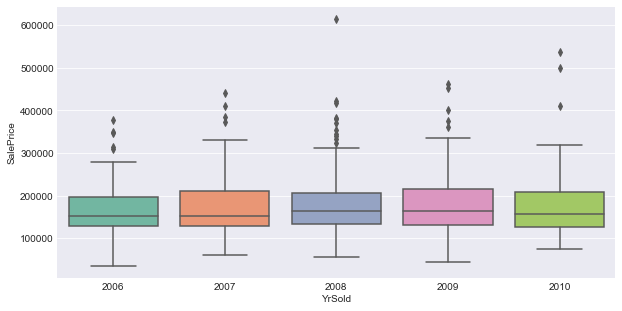

In [98]:
fig, ax = plt.subplots(figsize=(10,5))
sns.boxplot(x='YrSold', y='SalePrice', data=train,palette="Set2")

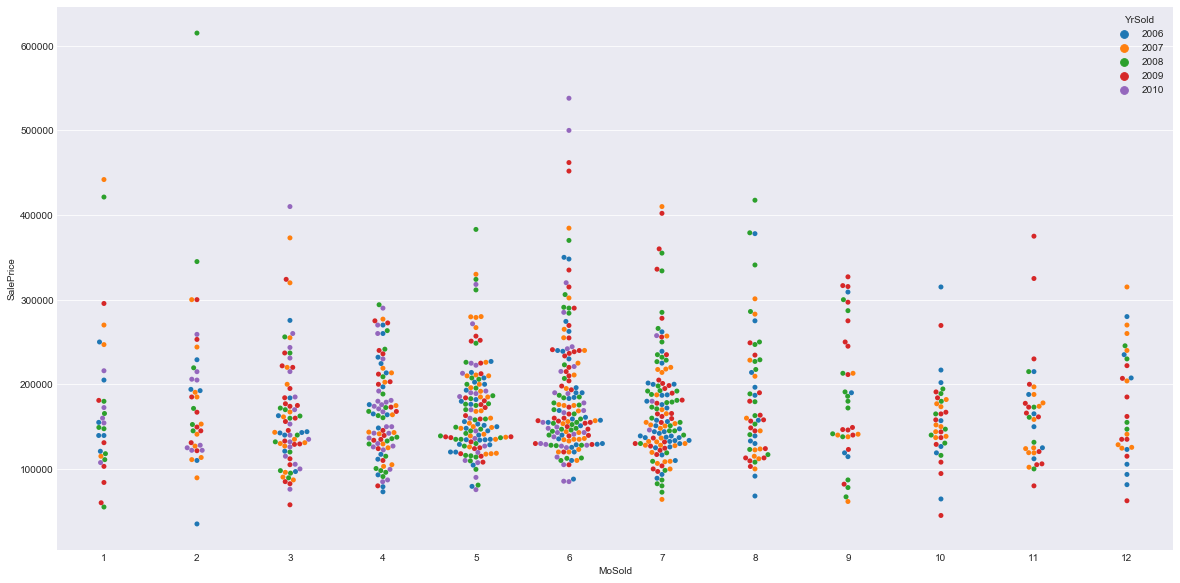

In [99]:
fig, ax = plt.subplots(figsize=(20,10))
sns.swarmplot(x='MoSold', y='SalePrice', data=train, hue='YrSold')
plt.show() 

# Molel evaluation and estimation

In [1]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LassoCV
from sklearn.model_selection import KFold
from sklearn.metrics import r2_score 
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import make_scorer
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import statsmodels.formula.api as smf
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import AdaBoostRegressor, GradientBoostingRegressor, ExtraTreesRegressor
from sklearn.tree import DecisionTreeRegressor
from QBUS2820 import rmse_jack, r2_jack 
from sklearn.linear_model import Ridge 
from sklearn.linear_model import Lasso
from sklearn.linear_model import RidgeCV
import xgboost as xgb
from sklearn.grid_search import GridSearchCV
from ExtraCode import getResultTable
from sklearn.model_selection import cross_val_score
from QBUS2820 import forward
from sklearn.linear_model import ElasticNet
from QBUS2820 import pcrCV
from QBUS2820 import plsCV
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score,GridSearchCV
#Stop warnings
import warnings
def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn

/Users/ChristopherHyland/anaconda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools
/Users/ChristopherHyland/anaconda/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/Users/ChristopherHyland/anaconda/lib/python3.6/site-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module wil

In [4]:
data = pd.read_csv('Train6.csv')
final_train = data.sample(frac=0.6, random_state=1)
final_test = data[data.index.isin(final_train.index)==False]
final_train.head()
y_train = final_train.pop('SalePrice')
y_test = final_test.pop('SalePrice')
y_train = np.log(y_train)



In [6]:
data['LotArea'].corr(data['LotFrontage'])

0.037147231456744451

In [26]:
pred = []
method = []

### Testing Models

In [27]:
#Forward selection
fwd = forward()
fwd.fit(final_train, y_train)
predforward = fwd.predict(final_test)
method.append('Forward')
pred.append(np.exp(predforward))

GBoost = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05,
                                   max_depth=4, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10, 
                                   loss='huber', random_state =5)
GBoost.fit(final_train,y_train)
predFinalBoost = GBoost.predict(final_test)
method.append('GBoost')
pred.append(np.exp(predFinalBoost))

regr = AdaBoostRegressor(loss='linear', learning_rate = 1, n_estimators = 350)
regr = regr.fit(final_train,y_train)
adapred = regr.predict(final_test)
method.append('AdaBoost')
pred.append(np.exp(adapred))

In [28]:
xgdmat = xgb.DMatrix(final_train, y_train) # Create our DMatrix to make XGBoost more efficient
our_params = {'eta': 0.1, 'seed':0, 'subsample': 0.8, 'colsample_bytree': 0.8, 
             'objective': 'reg:linear', 'max_depth':3, 'min_child_weight':1} 

final_gb = xgb.train(our_params, xgdmat, num_boost_round = 432)
testFinaldmat = xgb.DMatrix(final_test)
xgpred = final_gb.predict(testFinaldmat)
method.append('XGBoost')
pred.append(np.exp(xgpred))

In [29]:
pred2 = (np.exp(xgpred)+np.exp(adapred)+np.exp(predFinalBoost))/3
pred.append(pred2)
method.append('XGBoost, ada, GB')

In [30]:
pred3 = (np.exp(xgpred)+np.exp(predFinalBoost))/2

pred5 = (np.exp(xgpred)+np.exp(adapred))/2
pred.append(pred3)
pred.append(pred5)
method.append('xg GB')
method.append('xg adaboost')

In [31]:
#Extremely Random forest
regr2 = ExtraTreesRegressor(criterion='mae',max_depth=None,min_samples_split=2)
regr2 = regr.fit(final_train,y_train)

predFinalExtRandomForestlad = regr2.predict(final_test)
pred.append(np.exp(predFinalExtRandomForestlad))
method.append('Random Forest') 

In [32]:
pred5 = (np.exp(xgpred)+np.exp(predFinalExtRandomForestlad)+np.exp(predFinalBoost))/3
pred.append(pred5)
method.append('XGBoost, random tree, GB')

In [33]:
pred6 = (np.exp(xgpred)+np.exp(predFinalExtRandomForestlad))/2
pred.append(pred6)
method.append('xg Random tree')

In [34]:
pred10 = (np.exp(xgpred)+np.exp(predFinalBoost)+np.exp(predFinalExtRandomForestlad))/3
pred.append(pred10)
method.append('XGBoost, GBoost Random Forest')

In [35]:
#LASSO
lasso = Lasso(alpha = 1)
lasso.fit(final_train, np.ravel(y_train)) 
pred_L = lasso.predict(final_test)
method.append('LASSO')
pred.append(np.exp(pred_L))

In [36]:
alpha = 10
rg = Ridge(alpha = alpha)
rg.fit(final_train, y_train)
y_pred_rg = (rg.predict(final_test))
y_pred_rg

pred.append(np.exp(y_pred_rg))
method.append('Ridge alpha 10')

In [37]:
pred11 = (np.exp(xgpred)+np.exp(predFinalBoost)+np.exp(predFinalExtRandomForestlad)+np.exp(y_pred_rg))/4
pred.append(pred11)
method.append('XGBoost, GBoost Random Forest Ridge')

In [38]:
pred12 = (np.exp(xgpred)+np.exp(predFinalBoost)+np.exp(predFinalExtRandomForestlad)+np.exp(pred_L))/4
pred.append(pred12)
method.append('XGBoost, GBoost Random Forest LASSO')

In [39]:
regr = ElasticNet(random_state=0, alpha = 1)
    
regr.fit(final_train, y_train)    
pred13 = regr.predict(final_test)
pred.append(np.exp(pred13))
method.append('ENET') 

In [40]:
pred12 = (np.exp(xgpred)+np.exp(predFinalBoost)+np.exp(predFinalExtRandomForestlad)+np.exp(pred13))/4
pred.append(pred12)
method.append('XGBoost, GBoost Random Forest ENET')

In [41]:
pred13 = (np.exp(xgpred)+np.exp(predFinalBoost)+np.exp(y_pred_rg))/3
pred.append(pred13)
method.append('XGBoost, GBoost Ridge')

In [42]:
pred14 = (np.exp(xgpred)+np.exp(predFinalBoost)+np.exp(y_pred_rg)+np.exp(predforward))/4
pred.append(pred14)
method.append('XGBoost, GBoost Ridge Forward')

In [43]:
pred15 = (np.exp(xgpred)+np.exp(predFinalBoost)+np.exp(y_pred_rg)+np.exp(predforward)+ np.exp(predFinalExtRandomForestlad))/5
pred.append(pred15)
method.append('XGBoost, GBoost Ridge Forward Tree')

In [44]:
pred16 = (np.exp(xgpred)+np.exp(predFinalBoost)+np.exp(y_pred_rg)+np.exp(predforward)+ np.exp(pred_L))/5
pred.append(pred16)
method.append('XGBoost, GBoost Ridge Forward Lasso')

In [45]:
pred15 = (np.exp(xgpred)+np.exp(predFinalBoost)+ np.exp(predFinalExtRandomForestlad))/3
pred.append(pred15)
method.append('XGBoost, GBoost, RandomTree')

In [46]:

pred15 = ((0.3*np.exp(xgpred))+(0.3*np.exp(predFinalBoost))+(0.2*np.exp(y_pred_rg))+(0.2*np.exp(predforward)))
pred.append(pred15)
method.append('XGBoost, GBoost Ridge Forward 30 30 20 20')

In [47]:
pred16 = ((0.4*np.exp(xgpred))+(0.4*np.exp(predFinalBoost))+(0.1*np.exp(y_pred_rg))+(0.1*np.exp(predforward)))
pred.append(pred16)
method.append('XGBoost, GBoost Ridge Forward 40 40 10 10')

In [48]:
pred20 = ((0.2*np.exp(xgpred))+(0.4*np.exp(predFinalBoost))+(0.2*np.exp(y_pred_rg))+(0.2*np.exp(predforward)))
pred.append(pred20)
method.append('XGBoost, GBoost Ridge Forward 20 40 20 20')

In [49]:
pred21 = ((0.15*np.exp(xgpred))+(0.35*np.exp(predFinalBoost))+(0.1*np.exp(y_pred_rg))+(0.35*np.exp(predforward))+ (0.05*np.exp(predFinalExtRandomForestlad)))
pred.append(pred21)
method.append('XGBoost, GBoost Ridge Forward RandomForest 15 35 10 35 5')

In [19]:
from pandas.tools.plotting import table
def getResultTable(rows, predictions):
    columns=['Test RMSE', 'SE', 'Jack R2', 'SE', 'MAE', 'R-square']
    results=pd.DataFrame(0.0, columns=columns, index=rows)

    for row,pred in zip(range(0,len(rows)),predictions):
        results.iloc[row,0], results.iloc[row,1] = rmse_jack(y_test, pred)
        results.iloc[row,2], results.iloc[row,3] = (r2_jack(y_test, pred))
        results.iloc[row,4] = mean_absolute_error(y_test, pred)
        results.iloc[row,5] = r2_score(y_test,pred)
        
    ax = plt.subplot(111, frame_on=False) # no visible frame
    ax.xaxis.set_visible(False)  # hide the x axis
    ax.yaxis.set_visible(False)  # hide the y axis
    table(ax, results)  
    plt.savefig('ResultTable.png')
    return results.round(3)

In [50]:
getResultTable(method,pred)

,Test RMSE,SE,Jack R2,SE,MAE,R-square
Forward,23834.417,4933.468,0.884,0.047,14042.658,0.884
GBoost,19401.538,2816.862,0.923,0.015,12968.305,0.923
AdaBoost,26103.400,3564.944,0.861,0.024,18208.122,0.861
XGBoost,20400.397,3406.287,0.915,0.020,13619.232,0.915
"XGBoost, ada, GB",20346.542,3526.990,0.915,0.020,13489.676,0.915
xg GB,19250.267,3211.549,0.924,0.017,12745.760,0.924
xg adaboost,21708.301,3736.986,0.904,0.023,14576.759,0.904
Random Forest,25833.711,3558.376,0.864,0.024,18034.141,0.864
"XGBoost, random tree, GB",20305.248,3519.203,0.916,0.020,13478.282,0.916
xg Random tree,21641.797,3725.503,0.904,0.023,14591.754,0.904


In [38]:
from scipy.stats import norm, skew

numeric_feats = final_train.dtypes[final_train.dtypes != "object"].index

# Check the skew of all numerical features
skewed_feats = final_train[numeric_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
print("\nSkew in numerical features: \n")
skewness = pd.DataFrame({'Skew' :skewed_feats})
skewness

#Looking at skewness


Skew in numerical features: 



,Skew
Heating_Grav,21.886116
Exterior2nd_AsphShn,21.886116
Foundation_Stone,21.886116
Condition2_Feedr,21.886116
Heating_OthW,21.886116
Heating_Floor,21.886116
Condition1_PosA,21.886116
Exterior1st_ImStucc,21.886116
Condition1_RRNn,21.886116
Condition2_PosN,21.886116


In [43]:
skewness = skewness[abs(skewness) > 0.75]
print("There are {} skewed numerical features to Box Cox transform".format(skewness.shape[0]))

There are 178 skewed numerical features to Box Cox transform


In [44]:
data = pd.read_csv('Train6_5.csv')
final_train = data.sample(frac=0.6, random_state=1)
final_test = data[data.index.isin(final_train.index)==False]
final_train.head()
y_train = final_train.pop('SalePrice')
y_test = final_test.pop('SalePrice')
y_train = np.log(y_train)

In [69]:
getResultTable(method,pred)
#Using different dataset

,Test RMSE,SE,Jack R2,SE,MAE,R-square
Forward,23834.417,4933.468,0.884,0.047,14042.658,0.884
GBoost,19848.273,2726.571,0.919,0.014,13377.121,0.919
AdaBoost,25888.656,3485.843,0.863,0.023,18085.040,0.863
XGBoost,21585.497,3938.374,0.905,0.024,13920.576,0.905
"XGBoost, ada, GB",20694.955,3654.334,0.912,0.021,13727.146,0.912
xg GB,20062.619,3413.365,0.918,0.019,13108.635,0.918
xg adaboost,22081.719,3984.074,0.900,0.025,14591.918,0.900
Random Forest,26084.902,3501.659,0.861,0.023,18270.072,0.861
"XGBoost, random tree, GB",20745.481,3662.208,0.912,0.021,13763.250,0.912
xg Random tree,22174.749,3991.683,0.900,0.025,14670.214,0.900


In [129]:
data = pd.read_csv('Train6_1.csv')
final_train = data.sample(frac=0.6, random_state=1)
final_test = data[data.index.isin(final_train.index)==False]
final_train.head()
y_train = final_train.pop('SalePrice')
y_test = final_test.pop('SalePrice')
y_train = np.log(y_train)

In [137]:
#Validation function
n_folds = 5

def mae_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(final_train)
    mae= -cross_val_score(model, final_train.values, y_train, scoring="neg_mean_absolute_error", cv = kf)
    return(mae)

In [161]:
#Base models
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.kernel_ridge import KernelRidge

LASSO = make_pipeline(RobustScaler(), Lasso(alpha =0.0005, random_state=1))

ExtraTrees = ExtraTreesRegressor(criterion='mae',max_depth=None,min_samples_split=2)

GBoost = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05,
                                   max_depth=4, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10, 
                                   loss='huber', random_state =5)

Adaboost = AdaBoostRegressor(loss='linear', learning_rate = 1, n_estimators = 350)

model_xgb1 = xgb.XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, 
                             learning_rate=0.05, max_depth=3, 
                             min_child_weight=1.7817, n_estimators=2200,
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.5213, silent=1,
                             nthread = -1)
#Kernel Ridge Regression
KRR = KernelRidge(alpha=0.6, kernel='polynomial', degree=1, coef0=2.5)

#ENET
ENet = make_pipeline(RobustScaler(), ElasticNet(alpha=0.0005, l1_ratio=.9, random_state=3))

In [208]:
score = mae_cv(LASSO)
print("LASSO SCORE {}".format(score.mean()))
LASSO.fit(final_train,y_train)
LASSOpred = LASSO.predict(final_test)
print(mae(y_test,np.exp(LASSOpred)))

LASSO SCORE 0.07177067709376508
12943.2529984


In [209]:
score = mae_cv(ExtraTrees)
print("Extra Trees SCORE {}".format(score.mean()))
ExtraTrees.fit(final_train,y_train)
pred = ExtraTrees.predict(final_test)
print(mae(y_test,np.exp(pred)))

Extra Trees SCORE 0.09861611936250789
16072.8785699


In [215]:
score = mae_cv(GBoost)
print("Gradient Boost SCORE {}".format(score.mean()))
GBoost.fit(final_train,y_train)
pred = GBoost.predict(final_test)
print(mae(y_test,np.exp(pred)))

Gradient Boost SCORE 0.07951927491985392
12968.3053946


In [216]:
score = mae_cv(Adaboost)
print("Adaboost Boost SCORE {}".format(score.mean()))
Adaboost.fit(final_train,y_train)
pred = Adaboost.predict(final_test)
print(mae(y_test,np.exp(pred)))

Adaboost Boost SCORE 0.10515896352836263
18034.624143


In [217]:
score = mae_cv(model_xgb1)
print("XGBoost1 SCORE {}".format(score.mean()))
model_xgb1.fit(final_train,y_train)
pred = model_xgb1.predict(final_test)
print(mae(y_test,np.exp(pred)))

XGBoost1 SCORE 0.08045839583955512
14468.6838849


In [218]:
score = mae_cv(KRR)
print("Kernel Ridge Regression SCORE {}".format(score.mean()))
KRR.fit(final_train,y_train)
pred = KRR.predict(final_test)
print(mae(y_test,np.exp(pred)))

Kernel Ridge Regression SCORE 0.07934887428790258
13690.8544618


In [219]:
score = mae_cv(ENet)
print("Elastic Net Ridge Regression SCORE {}".format(score.mean()))
ENet.fit(final_train,y_train)
pred = ENet.predict(final_test)
print(mae(y_test,np.exp(pred)))

Elastic Net Ridge Regression SCORE 0.07185323395965448
12972.2691102


In [150]:
#Taking average of models
class AveragingModels(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, models):
        self.models = models
        
    # we define clones of the original models to fit the data in
    def fit(self, X, y):
        self.models_ = [clone(x) for x in self.models]
        
        # Train cloned base models
        for model in self.models_:
            model.fit(X, y)

        return self
    
    #Now we do the predictions for cloned models and average them
    def predict(self, X):
        predictions = np.column_stack([
            model.predict(X) for model in self.models_
        ])
        return np.mean(predictions, axis=1)  

In [151]:
averaged_models = AveragingModels(models = (Adaboost, GBoost, model_xgb1, LASSO))
score = mae_cv(averaged_models)
print(" Averaged base models score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

 Averaged base models score: 0.0749 (0.0046)



In [165]:
averaged_models = AveragingModels(models = (Adaboost, GBoost, model_xgb1, LASSO,ENet,KRR,ExtraTrees))
score = mae_cv(averaged_models)
print(" Averaged base models score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

 Averaged base models score: 0.0716 (0.0060)



In [163]:
averaged_models = AveragingModels(models = (Adaboost, GBoost, model_xgb1, LASSO,ENet,KRR))
score = mae_cv(averaged_models)
print(" Averaged base models score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

 Averaged base models score: 0.0720 (0.0049)



In [164]:
averaged_models = AveragingModels(models = (GBoost, LASSO,ENet,KRR))
score = mae_cv(averaged_models)
print(" Averaged base models score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

 Averaged base models score: 0.0690 (0.0041)



In [207]:
averaged_models = AveragingModels(models = (GBoost,ENet,KRR))
score = mae_cv(averaged_models)
print(" Averaged base models score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

 Averaged base models score: 0.0696 (0.0041)



In [177]:
def mae(y, y_pred):
    return (mean_absolute_error(y, y_pred))

In [179]:
def rmsle(y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))

In [175]:
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
#Python class used for stacking models
class StackingAveragedModels(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, base_models, meta_model, n_folds=5):
        self.base_models = base_models
        self.meta_model = meta_model
        self.n_folds = n_folds
   
    # We again fit the data on clones of the original models
    def fit(self, X, y):
        self.base_models_ = [list() for x in self.base_models]
        self.meta_model_ = clone(self.meta_model)
        kfold = KFold(n_splits=self.n_folds, shuffle=True, random_state=15)
        
        # Train cloned base models then create out-of-fold predictions
        # that are needed to train the cloned meta-model
        out_of_fold_predictions = np.zeros((X.shape[0], len(self.base_models)))
        for i, model in enumerate(self.base_models):
            for train_index, holdout_index in kfold.split(X, y):
                instance = clone(model)
                self.base_models_[i].append(instance)
                instance.fit(X.values[train_index], y.values[train_index])
                y_pred = instance.predict(X.values[holdout_index])
                out_of_fold_predictions[holdout_index, i] = y_pred
                
        # Now train the cloned  meta-model using the out-of-fold predictions as new feature
        self.meta_model_.fit(out_of_fold_predictions, y)
        return self
   
    #Do the predictions of all base models on the test data and use the averaged predictions as 
    #meta-features for the final prediction which is done by the meta-model
    def predict(self, X):
        meta_features = np.column_stack([
            np.column_stack([model.predict(X) for model in base_models]).mean(axis=1)
            for base_models in self.base_models_ ])
        return self.meta_model_.predict(meta_features)

In [176]:
stacked_averaged_models = StackingAveragedModels(base_models = (ExtraTrees, GBoost),
                                                 meta_model = GBoost)

stacked_averaged_models.fit(final_train,y_train)

StackingAveragedModels(base_models=(ExtraTreesRegressor(bootstrap=False, criterion='mae', max_depth=None,
          max_features='auto', max_leaf_nodes=None,
          min_impurity_decrease=0.0, min_impurity_split=None,
          min_samples_leaf=1, min_samples_split=2,
          min_weight_fraction_leaf=0.0, n_estimators...           presort='auto', random_state=5, subsample=1.0, verbose=0,
             warm_start=False)),
            meta_model=GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.05, loss='huber', max_depth=4,
             max_features='sqrt', max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=15, min_samples_split=10,
             min_weight_fraction_leaf=0.0, n_estimators=3000,
             presort='auto', random_state=5, subsample=1.0, verbose=0,
             warm_start=False),
            n_folds=5)

In [178]:
stacked_train_pred = stacked_averaged_models.predict(final_test.values)
print(mae(y_test,np.exp(stacked_train_pred)))

15878.6035184


In [223]:
stacked_averaged_modelsa = StackingAveragedModels(base_models = (ENet, GBoost,KRR),
                                                 meta_model = LASSO)

stacked_averaged_modelsa.fit(final_train,y_train)
stacked_train_pred2 = stacked_averaged_modelsa.predict(final_test.values)
print(mae(y_test,np.exp(stacked_train_pred2)))

#Best model

12400.7904897


In [189]:
stacked_averaged_models3 = StackingAveragedModels(base_models = (GBoost, LASSO,ENet,KRR),
                                                 meta_model = LASSO)

stacked_averaged_models3.fit(final_train,y_train)
stacked_train_pred3 = stacked_averaged_models3.predict(final_test.values)
print(mae(y_test,np.exp(stacked_train_pred3)))

12402.8824678


In [190]:
stacked_averaged_models4 = StackingAveragedModels(base_models = (GBoost, LASSO,ENet,KRR),
                                                 meta_model = model_xgb1)

stacked_averaged_models4.fit(final_train,y_train)
stacked_train_pred4 = stacked_averaged_models4.predict(final_test.values)
print(mae(y_test,np.exp(stacked_train_pred4)))

12989.27903


In [191]:
stacked_averaged_models5 = StackingAveragedModels(base_models = (Adaboost, GBoost, model_xgb1, LASSO,ENet,KRR),
                                                 meta_model = model_xgb1)

stacked_averaged_models5.fit(final_train,y_train)
stacked_train_pred5 = stacked_averaged_models5.predict(final_test.values)
print(mae(y_test,np.exp(stacked_train_pred5)))

13299.4512689


In [192]:
stacked_averaged_models5 = StackingAveragedModels(base_models = (Adaboost, GBoost, model_xgb1, LASSO,ENet,KRR),
                                                 meta_model = LASSO)

stacked_averaged_models5.fit(final_train,y_train)
stacked_train_pred5 = stacked_averaged_models5.predict(final_test.values)
print(mae(y_test,np.exp(stacked_train_pred5)))

12483.4064417


In [193]:
stacked_averaged_models5 = StackingAveragedModels(base_models = (Adaboost, GBoost, model_xgb1, LASSO,ENet,KRR,ExtraTrees),
                                                 meta_model = LASSO)

stacked_averaged_models5.fit(final_train,y_train)
stacked_train_pred5 = stacked_averaged_models5.predict(final_test.values)
print(mae(y_test,np.exp(stacked_train_pred5)))

12384.3316688


In [198]:
listofmeta = [Adaboost, GBoost, model_xgb1, LASSO, ENet, KRR,ExtraTrees]
best_mae = np.inf
bestmeta = ''
for x in listofmeta:
    
    stacked_averaged_models = StackingAveragedModels(base_models = (Adaboost, GBoost, model_xgb1, LASSO,ENet,KRR),
                                                 meta_model = x)
    stacked_averaged_models.fit(final_train,y_train)
    stacked_train_pred = stacked_averaged_models.predict(final_test.values)
    curr_mae = mae(y_test,np.exp(stacked_train_pred))
    if curr_mae < best_mae:
        best_mae = curr_mae
        bestmeta = x
print("Best meta is {} with MAE of {}".format(bestmeta,best_mae))
#Best model to use is LASSO from this

Best meta is Pipeline(memory=None,
     steps=[('robustscaler', RobustScaler(copy=True, quantile_range=(25.0, 75.0), with_centering=True,
       with_scaling=True)), ('lasso', Lasso(alpha=0.0005, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=1,
   selection='cyclic', tol=0.0001, warm_start=False))]) with MAE of 12483.719962837855


In [224]:
stacked_averaged_models = StackingAveragedModels(base_models = ( GBoost,ENet,KRR),
                                                 meta_model = LASSO)
stacked_averaged_models.fit(final_train,y_train)
stacked_train_pred = stacked_averaged_models.predict(final_test.values)
print(mae(y_test,np.exp(stacked_train_pred)))

12402.7104505


In [195]:
averaged_models = AveragingModels(models = (GBoost, LASSO,ENet,KRR))
averaged_models.fit(final_train,y_train)
predaverage = averaged_models.predict(final_test)
print(mae(y_test,np.exp(predaverage)))

12320.8213473


In [225]:
averaged_models = AveragingModels(models = (GBoost,ENet,KRR))
averaged_models.fit(final_train,y_train)
predaverage = averaged_models.predict(final_test)
print(mae(y_test,np.exp(predaverage)))

#use this one too

12258.0086232


In [226]:
predagain = (0.2*stacked_train_pred) + (0.8*predaverage)
print(mae(y_test,np.exp(predagain)))

12253.8976872


In [227]:
model_xgb1.fit(final_train,y_train)
predxg = model_xgb1.predict(final_test)

LASSO.fit(final_train,y_train)
predlasso = LASSO.predict(final_test)

In [229]:
predagain2 = (0.2*stacked_train_pred) + (0.4*predaverage) +(0.2*predlasso) + (0.2*predxg)
print(mae(y_test,np.exp(predagain2)))

12387.3199553


In [230]:
predagain2 = (0.2*stacked_train_pred) + (0.6*predaverage) +(0.1*predlasso) + (0.1*predxg)
print(mae(y_test,np.exp(predagain2)))

12292.603685


In [231]:
predagain2 = (0.25*stacked_train_pred) + (0.25*predaverage) +(0.25*predlasso) + (0.25*predxg)
print(mae(y_test,np.exp(predagain2)))

12472.3567855


# Kaggle time

In [233]:
data = pd.read_csv('Train6_1.csv')
y_price = data.pop('SalePrice')
kaggle = pd.read_csv('Test6_1.csv')
y_price = np.log(y_price)

In [234]:
averaged_models = AveragingModels(models = (GBoost,ENet,KRR))
averaged_models.fit(data,y_price)
predaverage = averaged_models.predict(kaggle)


In [235]:
stacked_averaged_models = StackingAveragedModels(base_models = ( GBoost,ENet,KRR),
                                                 meta_model = LASSO)
stacked_averaged_models.fit(data,y_price)
stacked_train_pred = stacked_averaged_models.predict(kaggle.values)

In [239]:
finalprediction = np.exp((0.7*predaverage)+ (0.3*stacked_train_pred))

In [240]:
#This is for the indices
ind = np.arange(1,1609)
headers = ['Id','Prediction']
prediction = pd.DataFrame({'Id':ind, 'Prediction':finalprediction})
#Saving results into CSV file 
prediction.to_csv("Day19_3.csv", index=False)

In [241]:
prediction

,Id,Prediction
0,1,98089.612287
1,2,155161.131382
2,3,133532.440971
3,4,188068.766965
4,5,144713.767614
5,6,375177.058017
6,7,131185.455299
7,8,281383.668333
8,9,115099.349226
9,10,127309.433744


In [242]:
model_xgb1.fit(data,y_price)
predxg = model_xgb1.predict(kaggle)

In [243]:
GBoost.fit(data,y_price)
predboost = GBoost.predict(kaggle)

In [244]:
finalprediction2 = np.exp((0.4*predaverage)+ (0.2*stacked_train_pred) + (0.2*predxg)+(0.2*predboost))

In [246]:
#This is for the indices
ind = np.arange(1,1609)
headers = ['Id','Prediction']
prediction2 = pd.DataFrame({'Id':ind, 'Prediction':finalprediction2})
#Saving results into CSV file 
prediction2.to_csv("Day19_4.csv", index=False)

In [ ]:
#Day 19_5 is when we combine the stack + ensemble